In [ ]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
from IPython.display import Image
import imutils
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import keras
import tensorflow.keras as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img, img_to_array
import imutils

In [ ]:
os.mkdir('/content/Test-Data')
os.mkdir('/content/Test-Data/glioma_tumor')
os.mkdir('/content/Test-Data/meningioma_tumor')
os.mkdir('/content/Test-Data/pituitary_tumor')
os.mkdir('/content/Test-Data/no_tumor')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_dir = '/content/drive/MyDrive/majorProject/Dataset_Old/Testing/'

In [ ]:
classes = os.listdir('/content/drive/MyDrive/majorProject/Dataset_Old/Testing/')
classes

['no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']

In [ ]:
def crop_image(image, plot=False):

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)
    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    if plot:
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image

In [ ]:
test_glioma = test_dir + 'glioma_tumor'
test_meningioma = test_dir + 'meningioma_tumor'
test_pituitary = test_dir + 'pituitary_tumor'
test_no_tumor = test_dir + 'no_tumor'

j = 0
for i in tqdm(os.listdir(test_glioma)):
  path = os.path.join(test_glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/glioma_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_meningioma)):
  path = os.path.join(test_meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/meningioma_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_pituitary)):
  path = os.path.join(test_pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/pituitary_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(test_no_tumor)):
  path = os.path.join(test_no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)

  if img is not None:
    img = cv2.resize(img, (240, 240))
    save_path = '/content/Test-Data/no_tumor/' + str(j) + '.jpg'
    cv2.imwrite(save_path, img)
    j = j + 1

100%|██████████| 105/105 [00:02<00:00, 39.67it/s]


In [ ]:
datagen = ImageDataGenerator(rotation_range=10,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

test_data = datagen.flow_from_directory('/content/Test-Data/',
                                         target_size=(240, 240),
                                        class_mode='categorical',
                                        shuffle=False)


Found 394 images belonging to 4 classes.


In [ ]:
for batch_images, batch_labels in test_data:
    print("Batch shape - Images:", batch_images.shape, "Labels:", batch_labels.shape)
    print("Labels for this batch:", batch_labels)
    break

Batch shape - Images: (32, 240, 240, 3) Labels: (32, 4)
Labels for this batch: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [ ]:
y_test = test_data.classes

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=12):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    disp = sns.heatmap(
        cm, annot=True, cmap='Blues',
        annot_kws={"size": text_size}, fmt='g',
        linewidths=0.5, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)


    disp.set_title('Confusion Matrix', fontsize=24)
    disp.set_xlabel('Predicted Label', fontsize=20)
    disp.set_ylabel('True Label', fontsize=20)
    plt.yticks(rotation=0)

    plt.show()

    return

EfficientNetB1

In [ ]:
import tensorflow as tf

EfficientNetB1 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/EfficientnetB1.keras')


In [ ]:
EfficientNetB1.save_weights('/content/drive/MyDrive/majorProject/Save_Models/effnetWeight.h5')

In [ ]:
efficientnetB1Prob = EfficientNetB1.predict(test_data, verbose=1)
efficientnetB1_test_pred = tf.argmax(efficientnetB1Prob, axis=1)

13/13 [==============================] - 62s 5s/step


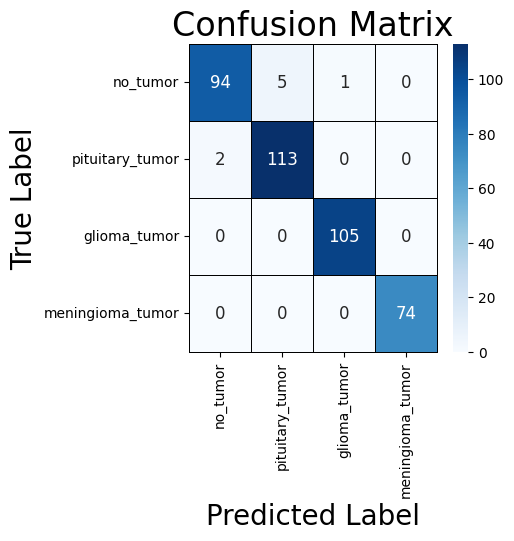

In [ ]:
#Confusion Matrix for EfficientNetB1
plot_confusion_matrix(
    y_test,
    efficientnetB1_test_pred,
    figsize=(4, 4),
    classes=classes)

MobileNetV2

In [ ]:
import tensorflow as tf

MobileNetV2 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/MobileNet.keras')


In [ ]:
MobileNetV2Prob = MobileNetV2.predict(test_data, verbose=1)
MobileNetV2_test_pred = tf.argmax(MobileNetV2Prob, axis=1)

13/13 [==============================] - 26s 2s/step


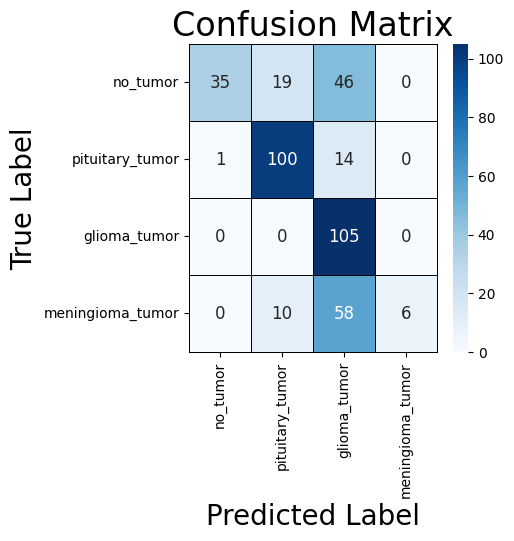

In [ ]:
#Confusion Matrix for EfficientNetB1
plot_confusion_matrix(
    y_test,
    MobileNetV2_test_pred,
    figsize=(4, 4),
    classes=classes)

InceptionV3

In [ ]:
import tensorflow as tf

InceptionV3 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/inception_model.h5')


In [ ]:
InceptionV3Prob = InceptionV3.predict(test_data, verbose=1)
InceptionV3_test_pred = tf.argmax(InceptionV3Prob, axis=1)

13/13 [==============================] - 66s 5s/step


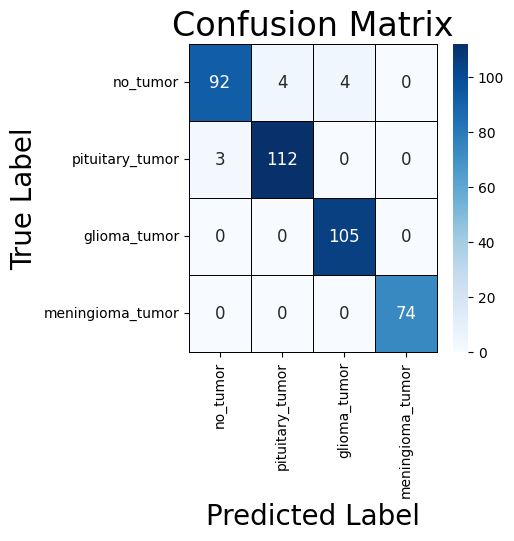

In [ ]:
plot_confusion_matrix(
    y_test,
    InceptionV3_test_pred,
    figsize=(4, 4),
    classes=classes)

ResNet50

In [ ]:
import tensorflow as tf

ResNet50 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/resnet_model.keras')


In [ ]:
ResNet50Prob = ResNet50.predict(test_data, verbose=1)
ResNet50_test_pred = tf.argmax(ResNet50Prob, axis=1)

13/13 [==============================] - 104s 8s/step


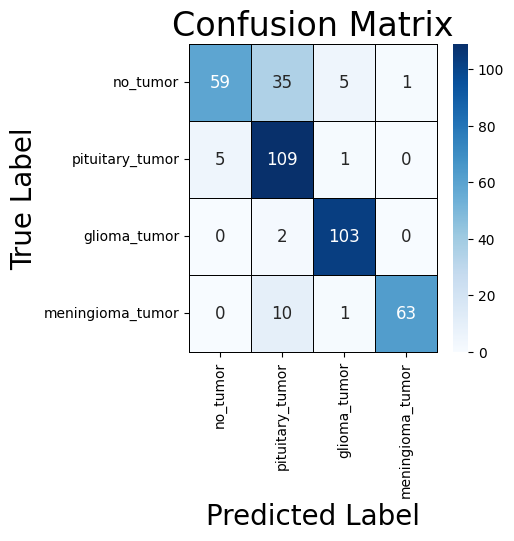

In [ ]:
plot_confusion_matrix(
    y_test,
    ResNet50_test_pred,
    figsize=(4, 4),
    classes=classes)

VGG16

In [ ]:
import tensorflow as tf

VGG16 = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/vgg16_model.keras')


In [ ]:
VGG16Prob = VGG16.predict(test_data, verbose=1)
VGG16_test_pred = tf.argmax(VGG16Prob, axis=1)

13/13 [==============================] - 288s 22s/step


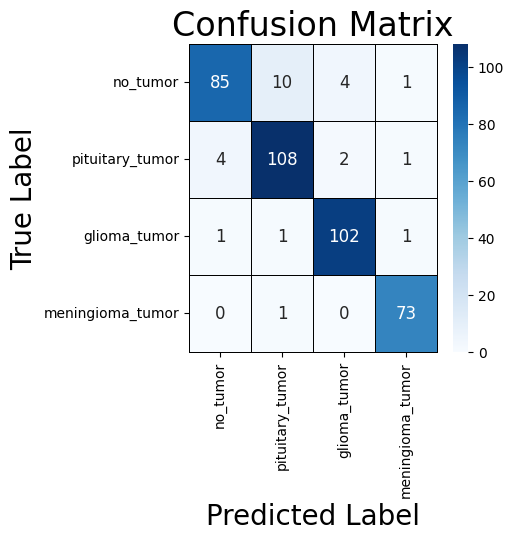

In [ ]:
plot_confusion_matrix(
    y_test,
    VGG16_test_pred,
    figsize=(4, 4),
    classes=classes)

In [ ]:
import tensorflow as tf

ViT = tf.keras.models.load_model('/content/drive/MyDrive/majorProject/Save_Models/vgg16_model.keras')


In [ ]:
ViTProb = ViT.predict(test_data, verbose=1)
ViT_test_pred = tf.argmax(ViTProb, axis=1)

13/13 [==============================] - 294s 22s/step


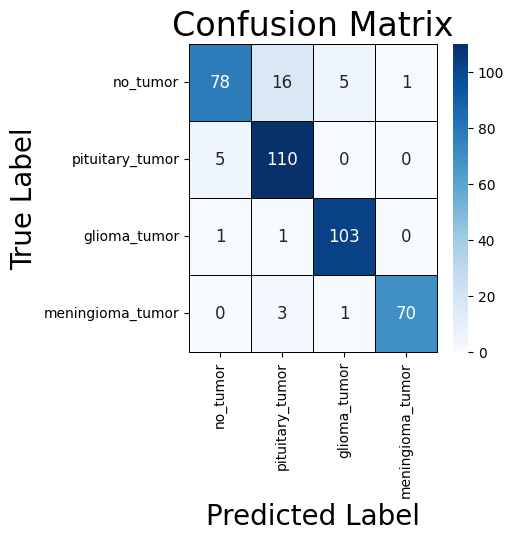

In [ ]:
#Confusion Matrix for ViT
plot_confusion_matrix(
    y_test,
    ViT_test_pred,
    figsize=(4, 4),
    classes=classes)

In [ ]:
#EfficientNetB1 Report
x = classification_report(y_test,
                            efficientnetB1_test_pred,
                            target_names=classes)
print(x)

                  precision    recall  f1-score   support

        no_tumor       0.98      0.94      0.96       100
 pituitary_tumor       0.96      0.98      0.97       115
    glioma_tumor       0.99      1.00      1.00       105
meningioma_tumor       1.00      1.00      1.00        74

        accuracy                           0.98       394
       macro avg       0.98      0.98      0.98       394
    weighted avg       0.98      0.98      0.98       394



In [ ]:
#MobileNetV2 Report
print(classification_report(y_test,
                            MobileNetV2_test_pred,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.97      0.35      0.51       100
 pituitary_tumor       0.78      0.87      0.82       115
    glioma_tumor       0.47      1.00      0.64       105
meningioma_tumor       1.00      0.08      0.15        74

        accuracy                           0.62       394
       macro avg       0.80      0.58      0.53       394
    weighted avg       0.79      0.62      0.57       394



In [ ]:
#InceptionV3 Report
print(classification_report(y_test,
                            InceptionV3_test_pred,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.97      0.92      0.94       100
 pituitary_tumor       0.97      0.97      0.97       115
    glioma_tumor       0.96      1.00      0.98       105
meningioma_tumor       1.00      1.00      1.00        74

        accuracy                           0.97       394
       macro avg       0.97      0.97      0.97       394
    weighted avg       0.97      0.97      0.97       394



In [ ]:
#ResNet50 Report
print(classification_report(y_test,
                            ResNet50_test_pred,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.92      0.59      0.72       100
 pituitary_tumor       0.70      0.95      0.80       115
    glioma_tumor       0.94      0.98      0.96       105
meningioma_tumor       0.98      0.85      0.91        74

        accuracy                           0.85       394
       macro avg       0.89      0.84      0.85       394
    weighted avg       0.87      0.85      0.84       394



In [ ]:
#VGG16 Report
print(classification_report(y_test,
                            VGG16_test_pred,
                            target_names=classes))

                  precision    recall  f1-score   support

        no_tumor       0.94      0.85      0.89       100
 pituitary_tumor       0.90      0.94      0.92       115
    glioma_tumor       0.94      0.97      0.96       105
meningioma_tumor       0.96      0.99      0.97        74

        accuracy                           0.93       394
       macro avg       0.94      0.94      0.94       394
    weighted avg       0.93      0.93      0.93       394



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    TN, FP, FN, TP = 0, 0, 0, 0

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    results = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

    return results


In [ ]:
EfficientnetB1_results = calculate_metrics(y_test, efficientnetB1_test_pred)
print(EfficientnetB1_results.keys())
EfficientnetB1_results.values()

dict_keys(['accuracy', 'precision', 'recall', 'f1'])


dict_values([0.9796954314720813, 0.979830505769032, 0.9796954314720813, 0.9796086329768213])

In [ ]:
EfficientnetB1_results = calculate_metrics(y_test, efficientnetB1_test_pred)
MobileNetV2_results = calculate_metrics(y_test, MobileNetV2_test_pred)
InceptionV3_results = calculate_metrics(y_test, InceptionV3_test_pred)
ResNet50_results = calculate_metrics(y_test, ResNet50_test_pred)
VGG16_results = calculate_metrics(y_test, VGG16_test_pred)

In [ ]:
InceptionV3_results = calculate_metrics(y_test, InceptionV3_test_pred)

In [ ]:
ResNet50_results = calculate_metrics(y_test, ResNet50_test_pred)

In [ ]:
VGG16_results = calculate_metrics(y_test, VGG16_test_pred)

In [ ]:
# EfficientnetB1
# MobileNetV2
# InceptionV3
# ResNet50
# VGG16

In [ ]:
results_df = pd.DataFrame([EfficientnetB1_results, MobileNetV2_results, InceptionV3_results, ResNet50_results, VGG16_results],
                          index=["EfficientnetB1", "MobileNetV2", "InceptionV3", "ResNet50", "VGG16"])

In [ ]:
results_df

,accuracy,precision,recall,f1
EfficientnetB1,0.979695,0.979831,0.979695,0.979609
MobileNetV2,0.624365,0.786317,0.624365,0.568676
InceptionV3,0.972081,0.972141,0.972081,0.971857
ResNet50,0.847716,0.872340,0.847716,0.844239
VGG16,0.934010,0.934493,0.934010,0.933416


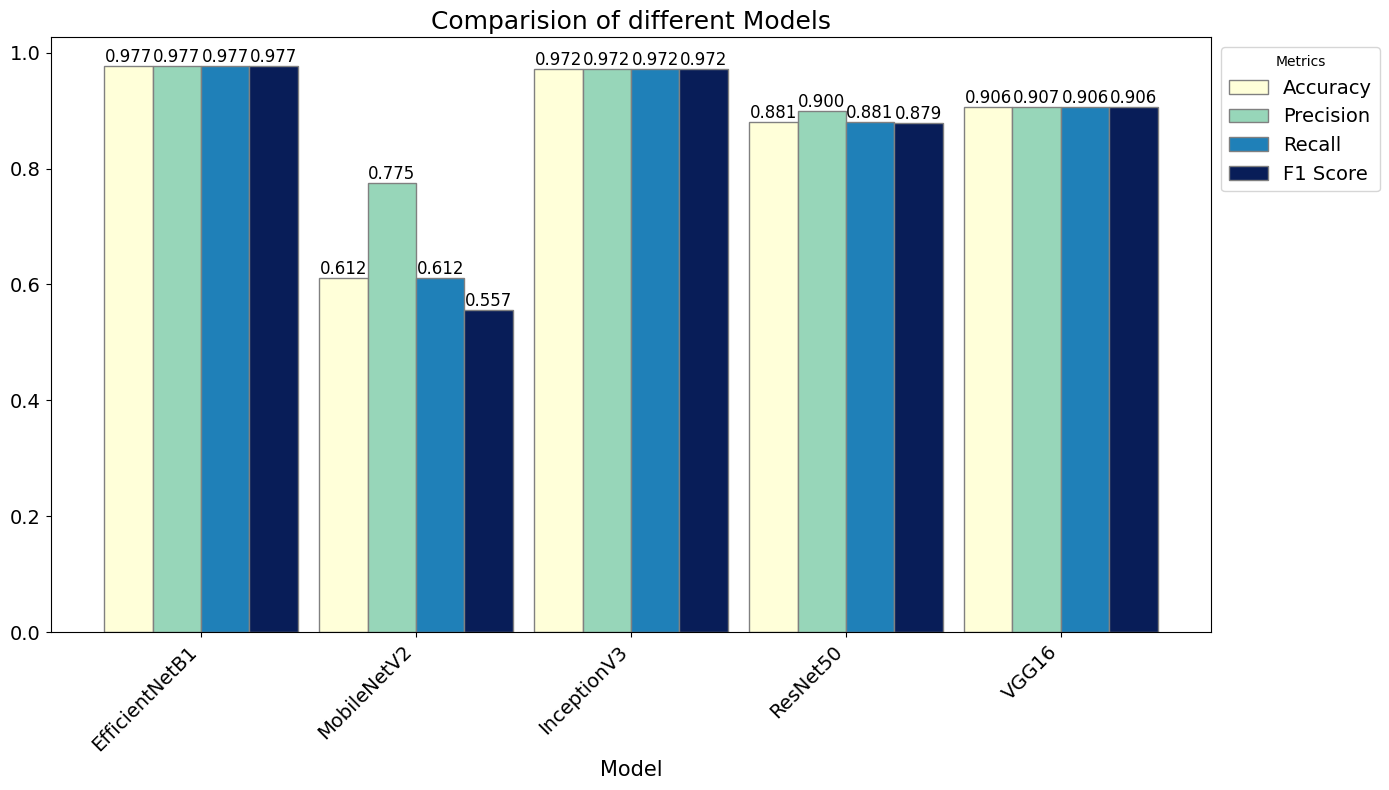

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each model (replace with your actual data)
data = {
    'Model': ['EfficientNetB1', 'MobileNetV2', 'InceptionV3', 'ResNet50', 'VGG16'],
    'Accuracy': [0.977157, 0.611675, 0.972081, 0.880711, 0.906091],
    'Precision': [0.977308, 0.775297, 0.972257, 0.899881, 0.906674],
    'Recall': [0.977157, 0.611675, 0.972081, 0.880711, 0.906091],
    'F1 Score': [0.977003, 0.556663, 0.971871, 0.878528, 0.905992]
}

df = pd.DataFrame(data)

# Plot the bar graph with space between bars
ax = df.set_index('Model').plot(kind='bar', width=0.9, edgecolor='grey', colormap='YlGnBu', figsize=(14, 8), fontsize=14)

# Add color labels at the bottom
colors = plt.cm.YlGnBu(range(len(df.columns) - 1))
legend_labels = df.columns[1:]
ax.legend(legend_labels, loc='upper left', title='Metrics', fontsize=14, bbox_to_anchor=(1, 1))

# Add metric values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.3f}', (x + width/2, y + height), ha='center', va='bottom', fontsize=12)

plt.title('Comparision of different Models', fontsize=18)
plt.xlabel('Model', fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


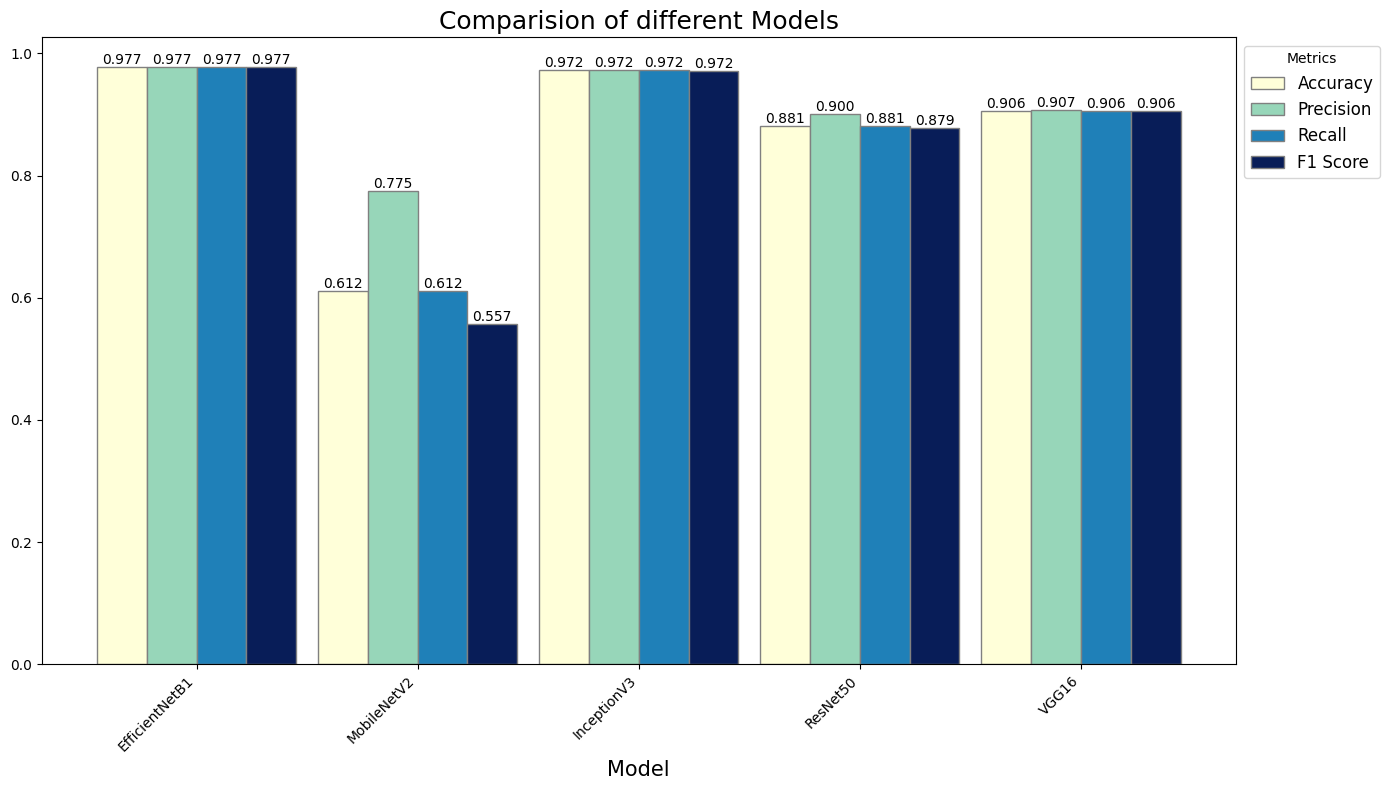

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each model (replace with your actual data)
data = {
    'Model': ['EfficientNetB1', 'MobileNetV2', 'InceptionV3', 'ResNet50', 'VGG16'],
    'Accuracy': [0.977157, 0.611675, 0.972081, 0.880711, 0.906091],
    'Precision': [0.977308, 0.775297, 0.972257, 0.899881, 0.906674],
    'Recall': [0.977157, 0.611675, 0.972081, 0.880711, 0.906091],
    'F1 Score': [0.977003, 0.556663, 0.971871, 0.878528, 0.905992]
}

df = pd.DataFrame(data)

# Plot the bar graph with space between bars
ax = df.set_index('Model').plot(kind='bar', width=0.9, edgecolor='grey', colormap='YlGnBu', figsize=(14, 8))

# Add color labels at the bottom
colors = plt.cm.YlGnBu(range(len(df.columns) - 1))
legend_labels = df.columns[1:]
ax.legend(legend_labels, loc='upper left', title='Metrics', fontsize=12, bbox_to_anchor=(1, 1))

# Add metric values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.3f}', (x + width/2, y + height), ha='center', va='bottom')

plt.title('Comparision of different Models', fontsize=18)
plt.xlabel('Model', fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics2(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Assuming your confusion matrix is for a multiclass classification
    # Adjust the unpacking based on the shape of your confusion matrix
    if cm.shape == (4, 4):
        TN_0, FP_0, FN_0, TP_0, TN_1, FP_1, FN_1, TP_1, TN_2, FP_2, FN_2, TP_2, TN_3, FP_3, FN_3, TP_3 = cm.ravel()
    else:
        # Modify this part based on the shape of your multi-class confusion matrix
        TN_0, FP_0, FN_0, TP_0, TN_1, FP_1, FN_1, TP_1, TN_2, FP_2, FN_2, TP_2, TN_3, FP_3, FN_3, TP_3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass

    results = {
        "TN_0": TN_0,
        "FP_0": FP_0,
        "FN_0": FN_0,
        "TP_0": TP_0,
        "TN_1": TN_1,
        "FP_1": FP_1,
        "FN_1": FN_1,
        "TP_1": TP_1,
        "TN_2": TN_2,
        "FP_2": FP_2,
        "FN_2": FN_2,
        "TP_2": TP_2,
        "TN_3": TN_3,
        "FP_3": FP_3,
        "FN_3": FN_3,
        "TP_3": TP_3,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }
    return results
